In [32]:
import open3d as o3d
import numpy as np

mesh = o3d.io.read_triangle_mesh(r"E:\Research\datasets\PSB\teddy\raw\obj\1.obj")
mesh.compute_vertex_normals()
mesh = mesh.simplify_quadric_decimation(target_number_of_triangles=5000)
mesh.paint_uniform_color([0.6, 0.6, 0.6])


# Mesh
o3d.visualization.draw_geometries([mesh], window_name="Mesh Visualization")
# o3d.visualization.draw_geometries([mesh_simplified], mesh_show_wireframe=True, window_name="Simplified Mesh with Wireframe")


# 点云
# pcd = mesh.sample_points_poisson_disk(number_of_points=5000)
# o3d.visualization.draw_geometries([pcd], window_name="Poisson Sampled Point Cloud")

# 体素
# voxel_size = 0.04
# voxel_grid = o3d.geometry.VoxelGrid.create_from_point_cloud(pcd, voxel_size=voxel_size)

# 计算体素的高度范围
# min_height = min([v.grid_index[2] for v in voxel_grid.get_voxels()])
# max_height = max([v.grid_index[2] for v in voxel_grid.get_voxels()])

# # 设定颜色渐变（高处浅色，低处深色）
# for voxel in voxel_grid.get_voxels():
#     height_factor = (voxel.grid_index[2] - min_height) / (max_height - min_height)
#     voxel.color = [0.2 + 0.6 * height_factor, 0.2 + 0.6 * height_factor, 0.8 - 0.6 * height_factor]

# # 显示渐变色体素
# o3d.visualization.draw_geometries([voxel_grid], window_name="Gradient Voxel Grid")






In [30]:
import open3d as o3d
import numpy as np

# 读取 Mesh
mesh = o3d.io.read_triangle_mesh(r"E:\Research\datasets\PSB\teddy\raw\obj\1.obj")
mesh.compute_vertex_normals()
mesh = mesh.simplify_quadric_decimation(target_number_of_triangles=5000)
mesh.paint_uniform_color([0.6, 0.6, 0.6])

# 计算面片质心
triangles = np.asarray(mesh.triangles)
vertices = np.asarray(mesh.vertices)
centroids = vertices[triangles].mean(axis=1)

# 提取点云（点表示）
pcd = o3d.geometry.PointCloud()
pcd.points = mesh.vertices
pcd.paint_uniform_color([0.8, 0.2, 0.2])  # 设为红色

# 显示点云（仅顶点）
# o3d.visualization.draw_geometries([pcd], window_name="Vertex Representation")


# 提取边信息
edges = mesh.get_non_manifold_edges()  # 获取非流形边

# 构建线框模型
line_set = o3d.geometry.LineSet.create_from_triangle_mesh(mesh)
line_set.paint_uniform_color([0, 0, 0])  # 设为黑色

# 显示线框（仅边）
o3d.visualization.draw_geometries([line_set], window_name="Wireframe Representation")




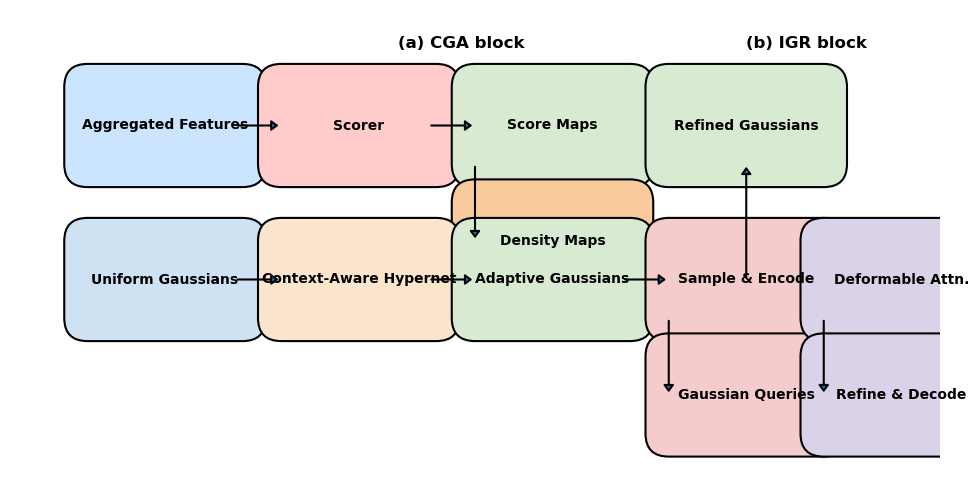